In [4]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import gmean

In [5]:
base_dir = "../logs/SPEC-CPU/v3/"
# Define trace names and configuration labels
trace_names = [ '450.soplex-247B', '462.libquantum-714B', 
'471.omnetpp-188B', '482.sphinx3-234B','602.gcc_s-2226B', '623.xalancbmk_s-10B']
configs = ['baseline','ipcp', 'ipcp_isb-V3-train_on_miss-pf_on_all', 'isb-l1']

fields = ['L1D LOAD      ACCESS', 'L2C LOAD      ACCESS', 'LLC LOAD      ACCESS']
# Initialize a dictionary to store IPC values for each trace and configuration
mpki_values = {trace: {field: {} for field in fields } for trace in trace_names}

mpki_values

{'450.soplex-247B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '462.libquantum-714B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '471.omnetpp-188B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '482.sphinx3-234B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '602.gcc_s-2226B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '623.xalancbmk_s-10B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}}}

In [6]:
def extract_mpki(field, log_file):
    with open(log_file, 'r') as f:
        for line in f:
            if field in line:
                mpki_value = float(re.search(r"MPKI:\s([\d\.]+)", line).group(1))
                return mpki_value
    return None

# Parse the IPC values from the log files
for trace in trace_names:
    for field in fields:
        for config in configs:
            log_file = base_dir + f"{trace}-{config}.log"
            mpki_values[trace][field][config] = extract_mpki(field, log_file)
# Calculate geometric mean for each configuration (excluding baseline)
geomeans = {field: {} for field in fields}
for config in configs:
    for field in fields:
        config_mpki = [mpki_values[trace][field][config] for trace in trace_names]
        geomeans[field][config] = gmean(config_mpki)  # Use scipy's gmean for geometric mean

mpki_values['Geomean'] = geomeans
trace_names += ['Geomean']
mpki_values

{'450.soplex-247B': {'L1D LOAD      ACCESS': {'baseline': 44.6552,
   'ipcp': 30.9107,
   'ipcp_isb-V3-train_on_miss-pf_on_all': 22.9603,
   'isb-l1': 29.552},
  'L2C LOAD      ACCESS': {'baseline': 35.271,
   'ipcp': 17.8316,
   'ipcp_isb-V3-train_on_miss-pf_on_all': 11.0091,
   'isb-l1': 18.3442},
  'LLC LOAD      ACCESS': {'baseline': 29.4909,
   'ipcp': 14.9201,
   'ipcp_isb-V3-train_on_miss-pf_on_all': 8.29688,
   'isb-l1': 13.9097}},
 '462.libquantum-714B': {'L1D LOAD      ACCESS': {'baseline': 26.5299,
   'ipcp': 4.82868,
   'ipcp_isb-V3-train_on_miss-pf_on_all': 4.64934,
   'isb-l1': 6.261},
  'L2C LOAD      ACCESS': {'baseline': 26.5299,
   'ipcp': 1.25794,
   'ipcp_isb-V3-train_on_miss-pf_on_all': 0.40836,
   'isb-l1': 3.4964},
  'LLC LOAD      ACCESS': {'baseline': 26.5299,
   'ipcp': 1.25794,
   'ipcp_isb-V3-train_on_miss-pf_on_all': 0.40836,
   'isb-l1': 3.4964}},
 '471.omnetpp-188B': {'L1D LOAD      ACCESS': {'baseline': 19.9641,
   'ipcp': 18.6855,
   'ipcp_isb-V3-train_

In [7]:
def plot_mpki(field):
    x = np.arange(len(trace_names))  # X axis positions for the traces
    width = 0.17  # Width of the bars
    colors = ["tab:orange","tab:blue", "tab:green", "tab:red"]

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars for each configuration
    for i, config in enumerate(configs):  # Skip baseline
        _mpki_values = [mpki_values[trace][field][config] for trace in trace_names]
        bars = ax.bar(x + i*width, _mpki_values, width, label=config, color=colors[i])

        # Annotate bars with speedup values
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',  # Format the annotation to 2 decimal places
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset text slightly above the bar
                        textcoords="offset points",
                        ha='center', va='bottom',rotation=90)


    # Add labels and titles
    ax.set_xlabel('SPEC CPU2017 Trace')
    ax.set_ylabel('MPKI')
    # ax.set_ylim(0.8, 2.0)
    ax.set_ylim(0.0, 90.0)
    ax.set_title(f"{field[:8]} MPKI")
    ax.set_xticks(x + 4*width / 2)
    ax.set_xticklabels(trace_names, rotation=15)
    ax.legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    # Update the labels
    plt.legend(handles, ['baseline', 'ipcp', 'ipcp_isb V3', 'isb-l1'])
    # Show the plot
    plt.tight_layout()
    plt.show()

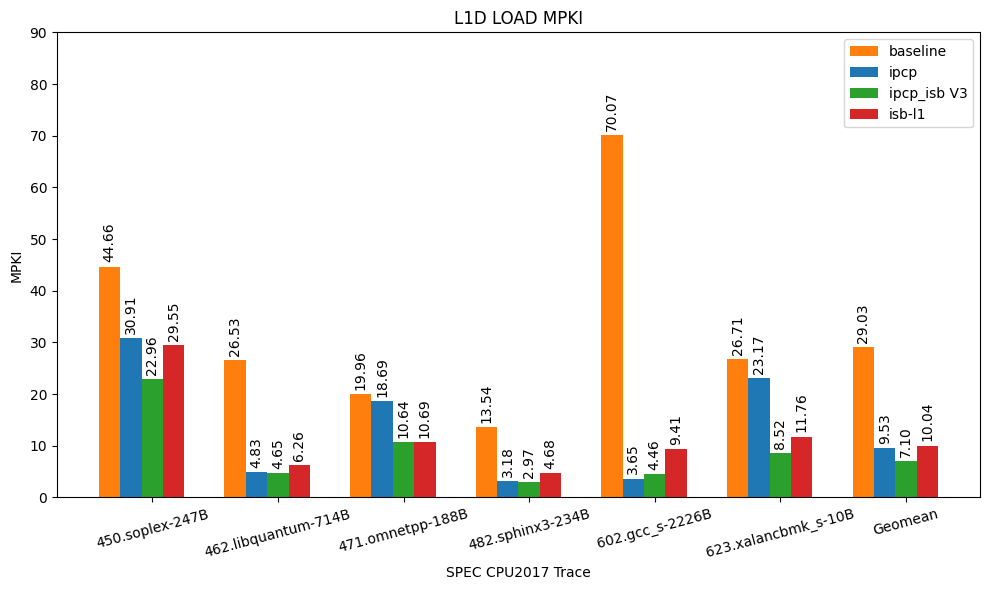

In [8]:
plot_mpki(fields[0])

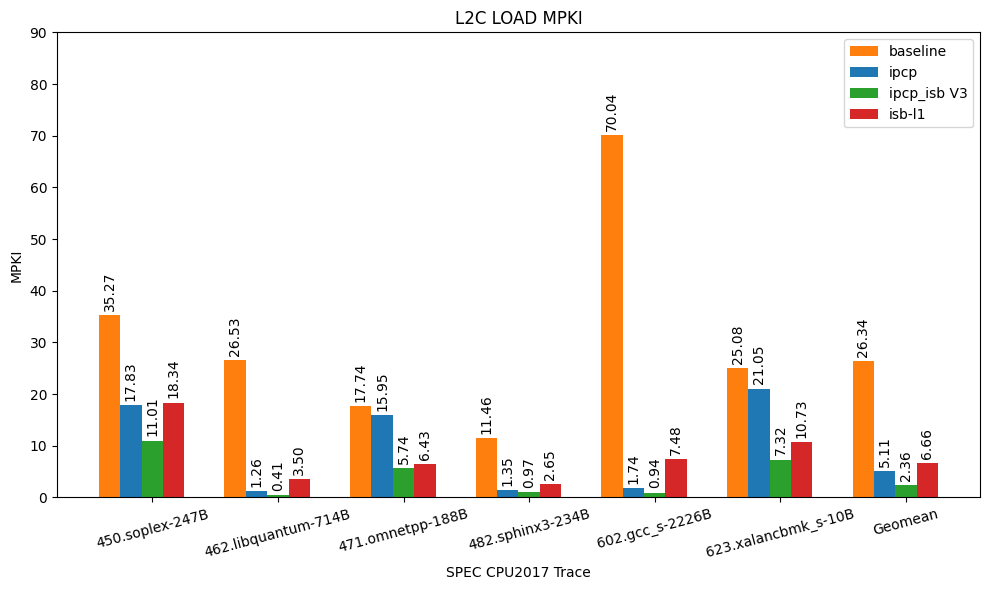

In [9]:
plot_mpki(fields[1])

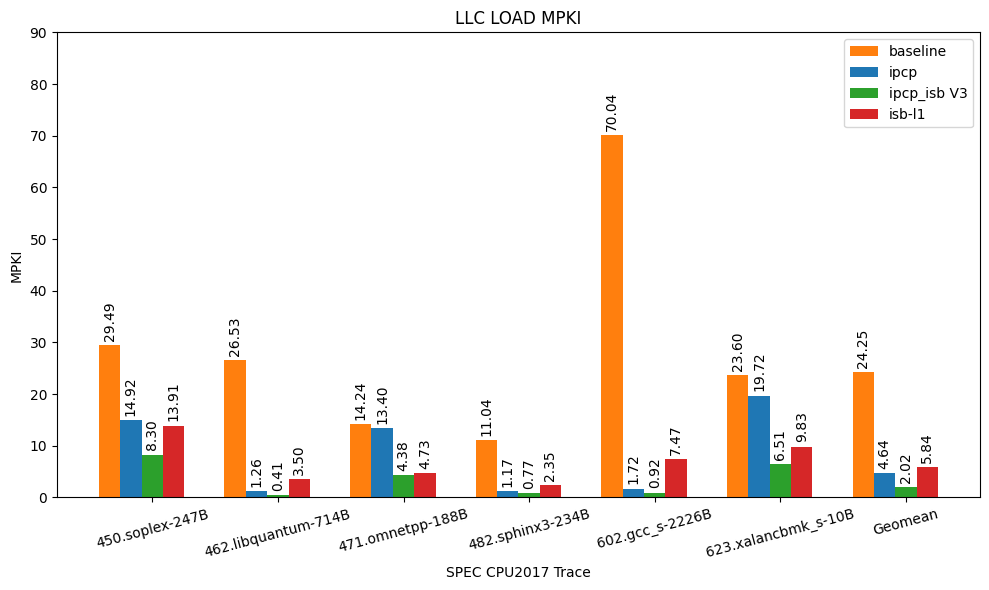

In [10]:
plot_mpki(fields[2])